In [1]:
from sklearn import datasets, tree, model_selection, metrics, ensemble
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import pickle
import numpy as np
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('diabetes.csv')
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [3]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
targets = data.Outcome ##  = data.iloc[0:, -2].copy()
targets

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [5]:
features = data.drop(['Outcome'], axis = 1).copy()
features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


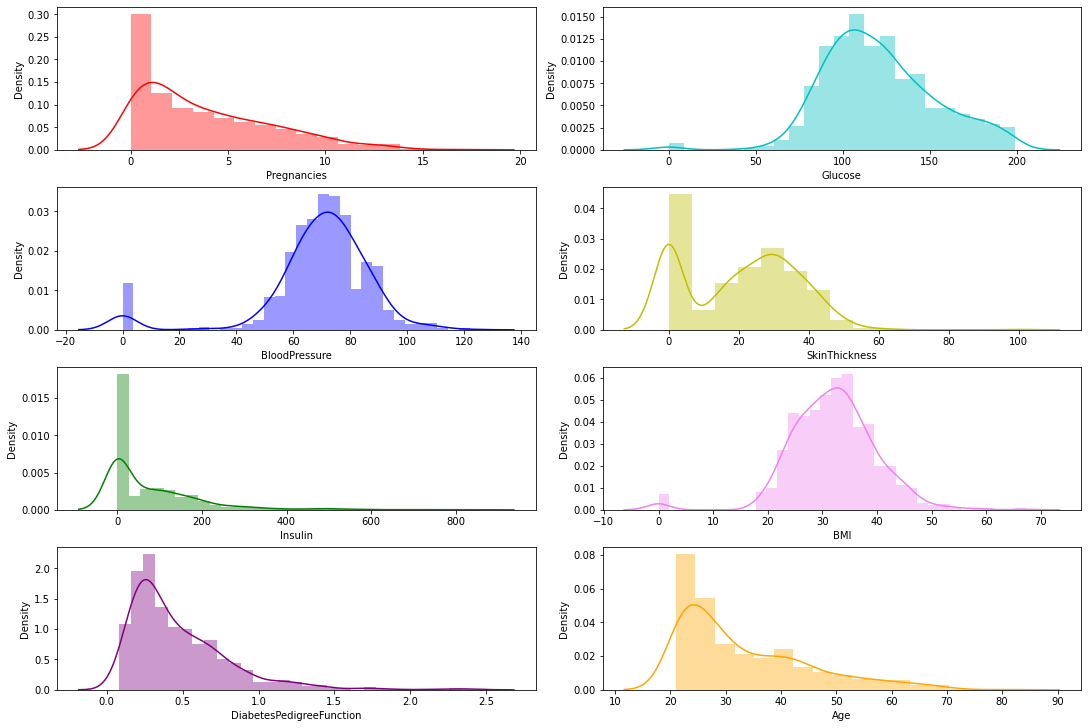

In [6]:
fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize = (15, 10), constrained_layout = True)
ax = ax.flatten()

colors = ['r', 'c', 'b', 'y', 'g', 'violet', 'purple', 'orange']
for i, c in enumerate(colors):
    sns.distplot(features.iloc[0:, i], color=c, ax=ax[i])
plt.show()

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    features, targets, test_size = 0.19, random_state = 42)

In [8]:
def decision_tree_accuracy(criterion, max_depth):
    dec_tree = tree.DecisionTreeClassifier(
        max_depth = max_depth, random_state = 42, criterion = criterion)
    dec_tree = dec_tree.fit(X_train, y_train)
    prediction_train = dec_tree.predict(X_train)
    prediction_test = dec_tree.predict(X_test)
    print('The Accuracy based on {} on Train set is {:.4f} {}'
          .format(criterion.capitalize(), metrics.accuracy_score(y_train, prediction_train)*100, '%'))
    print('The Accuracy based on {} on Test set is {:.4f} {}'
          .format(criterion.capitalize(), metrics.accuracy_score(y_test, prediction_test)*100, '%'))
    return dec_tree

In [9]:
fn = data.columns.values
cn = ['non-diabetic','diabetic']
def decision_tree_plot(criterion, dec_tree):
    plt.figure(figsize = (100, 75))
    tree.plot_tree(dec_tree, feature_names = fn,
                   class_names = cn, filled = True, node_ids = True)
    plt.savefig('{}.jpg'.format(criterion.capitalize()))
    plt.title(criterion.capitalize())
    plt.show()

In [10]:
dec_tree_entropy = decision_tree_accuracy('entropy', 5)

The Accuracy based on Entropy on Train set is 83.4405 %
The Accuracy based on Entropy on Test set is 80.1370 %


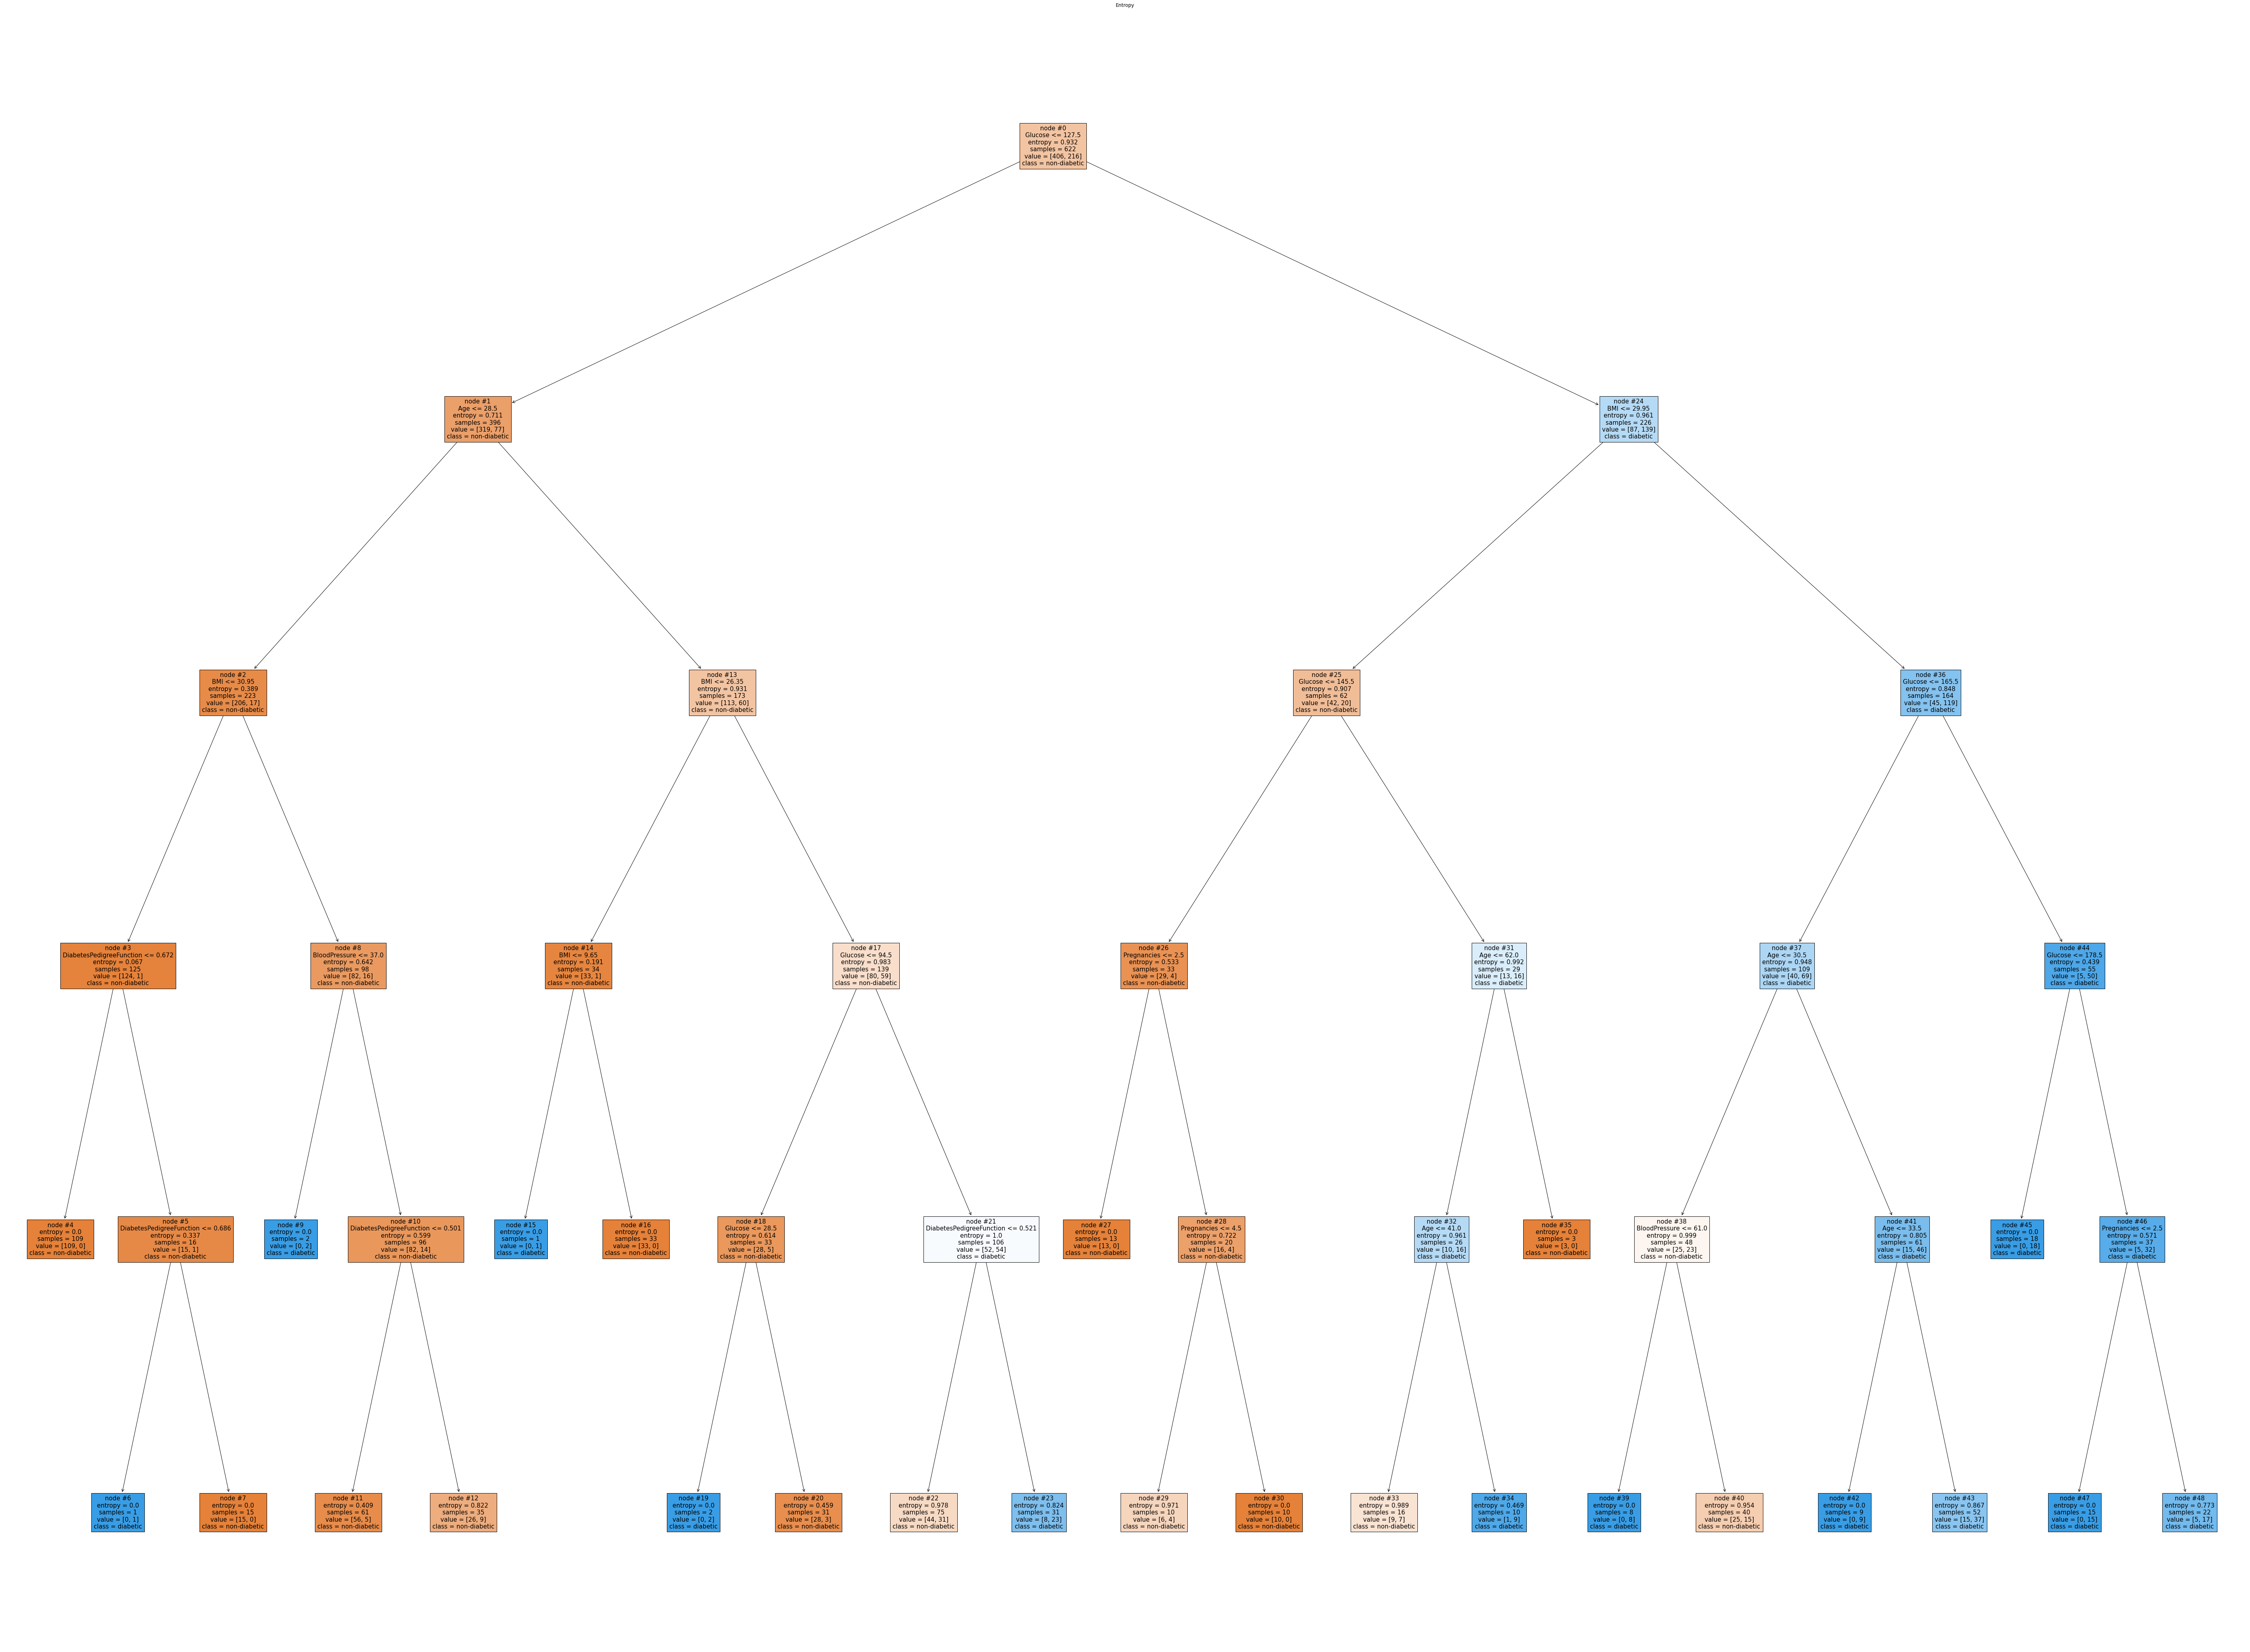

In [11]:
decision_tree_plot('entropy', dec_tree_entropy)

In [12]:
dec_tree_gini = decision_tree_accuracy('gini', 5)

The Accuracy based on Gini on Train set is 83.9228 %
The Accuracy based on Gini on Test set is 81.5068 %


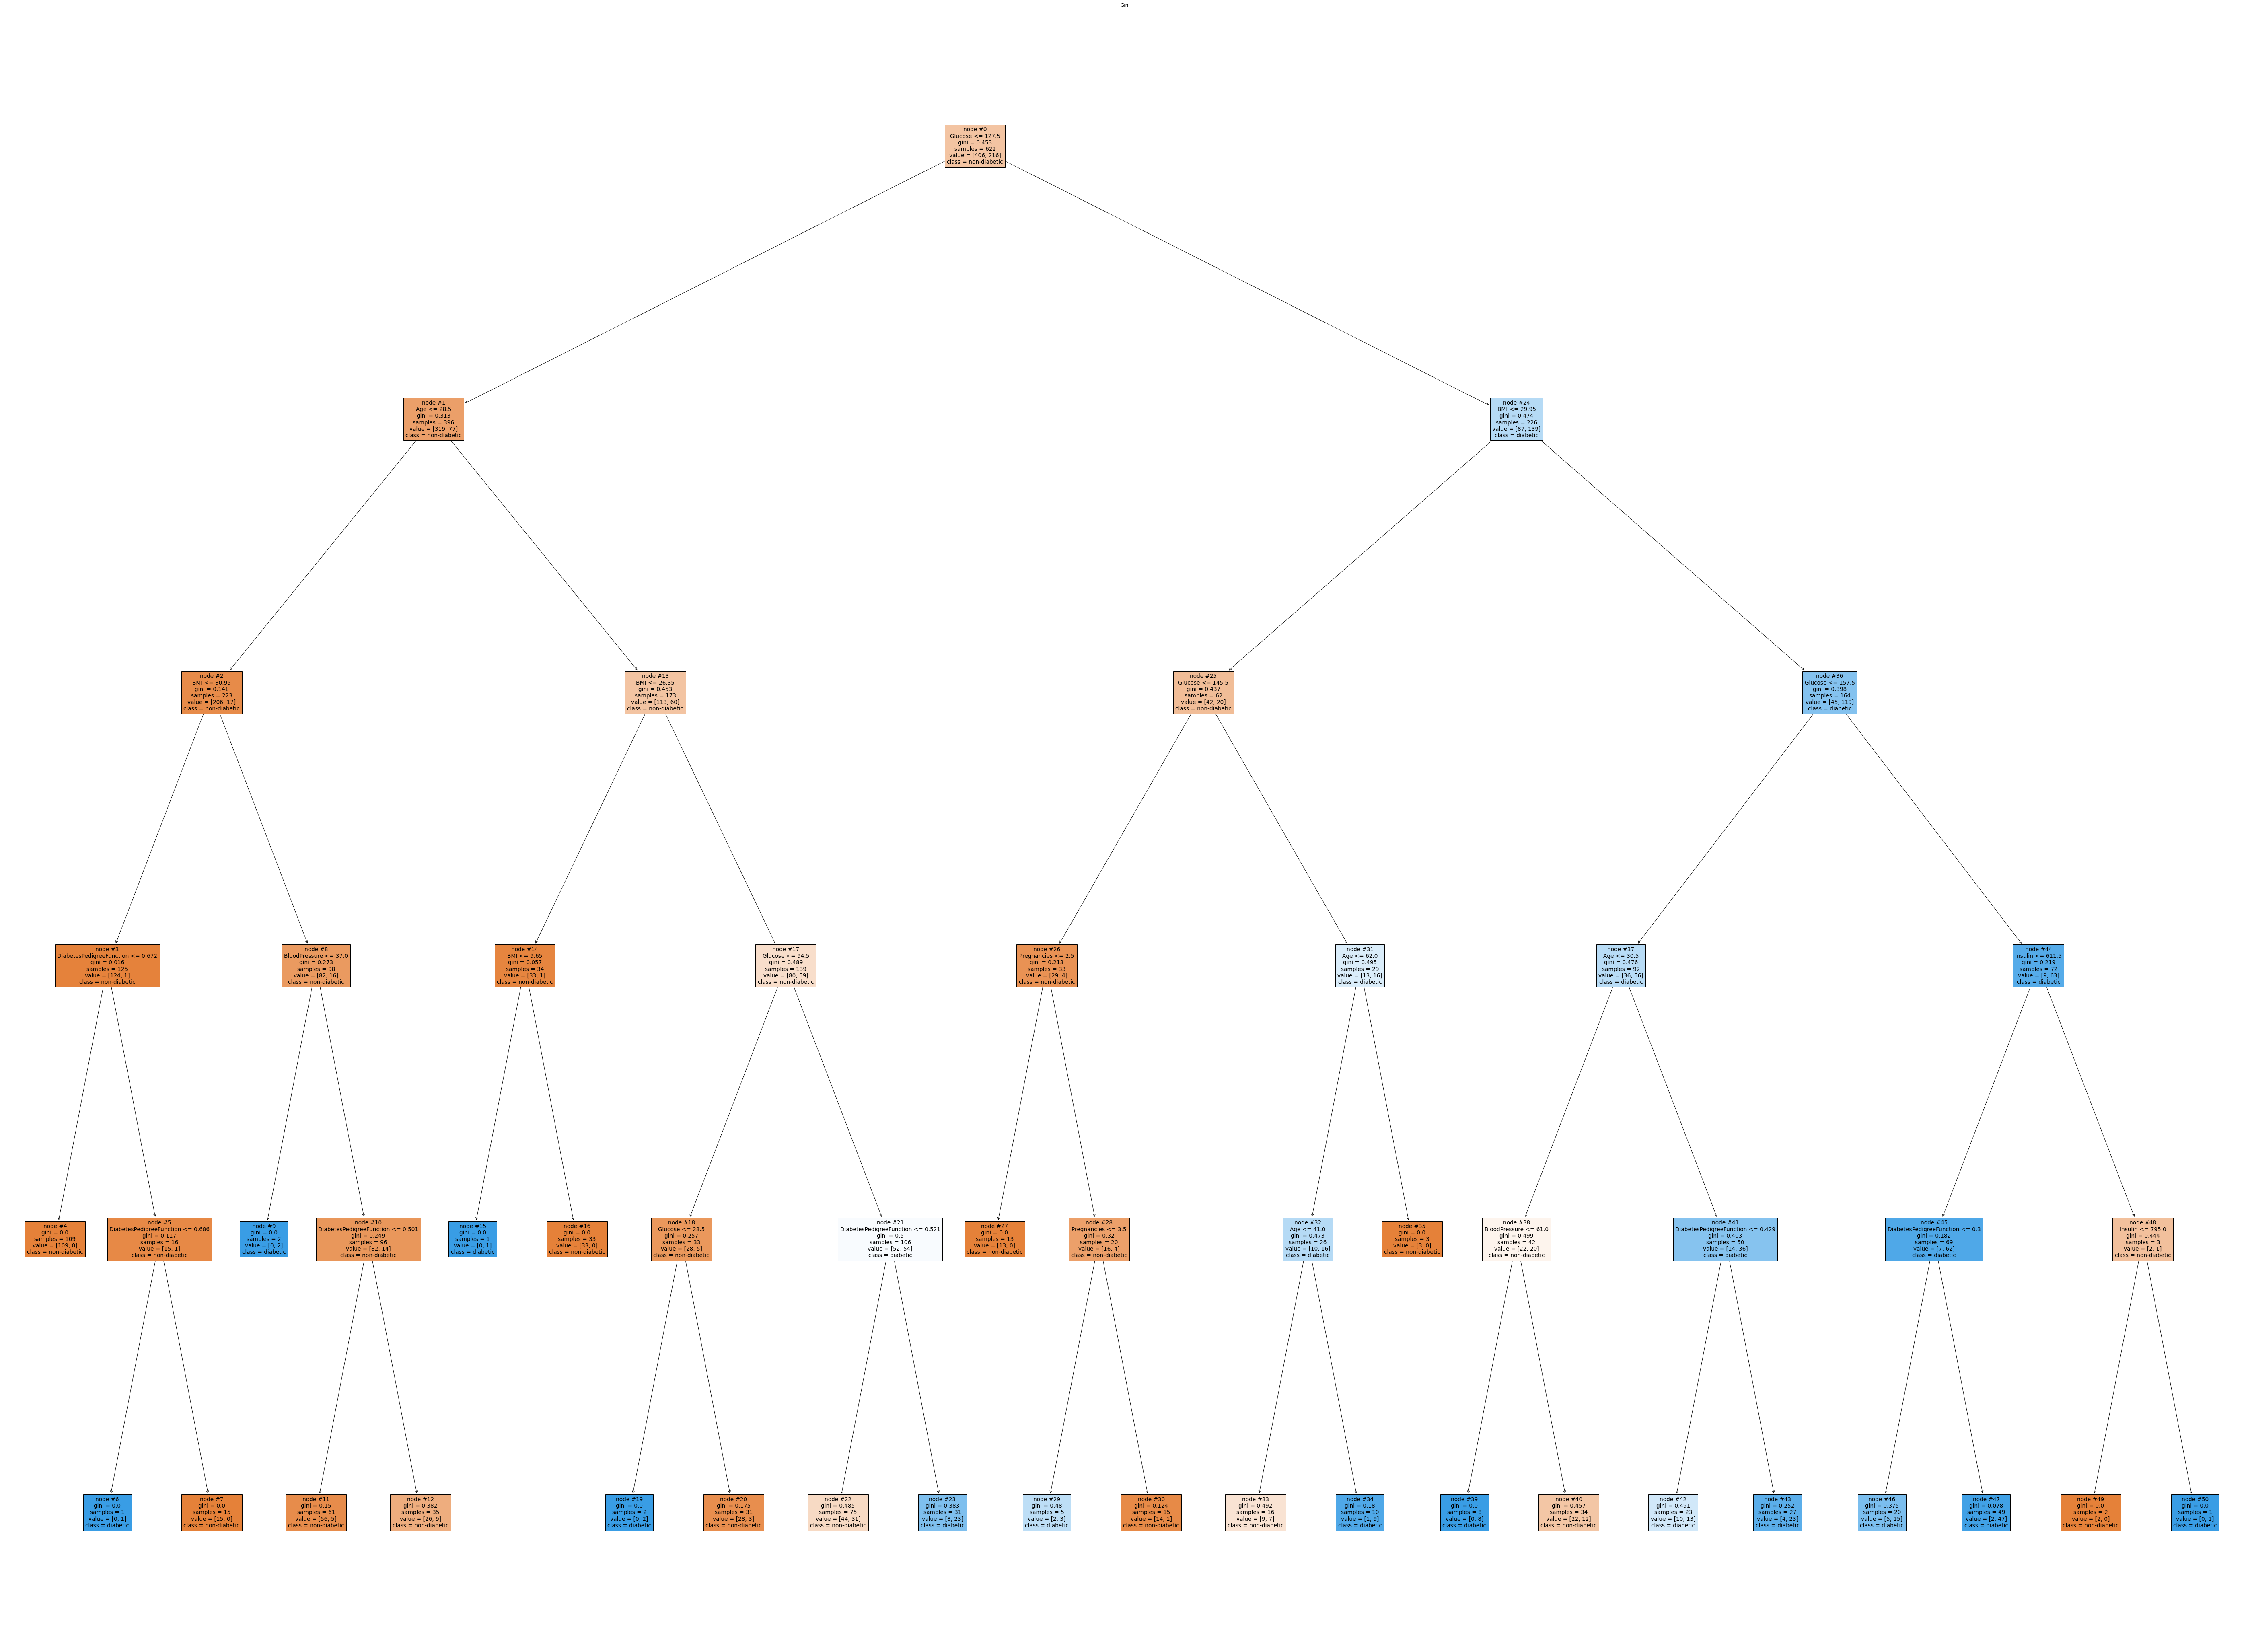

In [13]:
decision_tree_plot('gini', dec_tree_gini)

In [14]:
def confusion_matrix(model, title):
    metrics.plot_confusion_matrix(model, X_test, y_test, display_labels = cn)
    plt.title(title)
    plt.show()

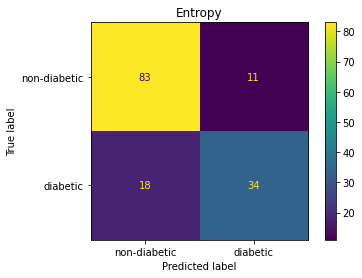

In [15]:
confusion_matrix(dec_tree_entropy, 'Entropy')

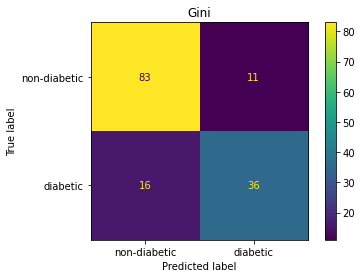

In [16]:
confusion_matrix(dec_tree_gini, 'Gini')

In [17]:
n_estimators = 8
random_forest = ensemble.RandomForestClassifier(n_estimators=n_estimators, criterion='gini', min_samples_leaf=2,
                                                min_samples_split=3, max_features='sqrt',
                                                random_state=21, n_jobs=2, max_depth=5)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=3, n_estimators=8, n_jobs=2,
                       random_state=21)

In [18]:
def print_rf_acc(n_estimators):
    prediction_train = random_forest.predict(X_train)
    prediction_test = random_forest.predict(X_test)
    print('The Accuracy based on {} on Train set is {:.4f} {} where n_estimators = {}'
          .format('Random Forest', metrics.accuracy_score(y_train, prediction_train)*100, '%', n_estimators))
    print('The Accuracy based on {} on Test set is {:.4f} {} where n_estimators = {}'
          .format('Random Forest', metrics.accuracy_score(y_test, prediction_test)*100, '%', n_estimators))

In [19]:
print_rf_acc(n_estimators)

The Accuracy based on Random Forest on Train set is 83.1190 % where n_estimators = 8
The Accuracy based on Random Forest on Test set is 82.1918 % where n_estimators = 8


In [20]:
for n in range(1, 100):
    random_forest = ensemble.RandomForestClassifier(n_estimators=n, criterion='gini', min_samples_leaf=2,
                                                    min_samples_split=3, max_features='sqrt',
                                                    random_state=21, n_jobs=2, max_depth=5)
    random_forest.fit(X_train, y_train)
    prediction_test = random_forest.predict(X_test)
    if metrics.accuracy_score(y_test, prediction_test)*100 > 82:
        print('The Accuracy based on {} on Test set is {:.4f} {}  where n_estimators = {}'
              .format('Random Forest', metrics.accuracy_score(y_test, prediction_test)*100, '%', n))

The Accuracy based on Random Forest on Test set is 82.8767 %  where n_estimators = 7
The Accuracy based on Random Forest on Test set is 82.1918 %  where n_estimators = 8


In [21]:
n_estimators = 7
random_forest = ensemble.RandomForestClassifier(n_estimators=n_estimators, criterion='gini', min_samples_leaf=2,
                                                min_samples_split=3, max_features='sqrt',
                                                random_state=21, n_jobs=2, max_depth=5)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=3, n_estimators=7, n_jobs=2,
                       random_state=21)

In [22]:
print_rf_acc(n_estimators)

The Accuracy based on Random Forest on Train set is 83.2797 % where n_estimators = 7
The Accuracy based on Random Forest on Test set is 82.8767 % where n_estimators = 7


In [23]:
median_dic = {
  'dpf_median': data['DiabetesPedigreeFunction'].median(),
  'skin_median': data['SkinThickness'].median(),
  'pressure_median': data['BloodPressure'].median()
}
median_dic

{'dpf_median': 0.3725, 'skin_median': 23.0, 'pressure_median': 72.0}

In [24]:
pickle.dump(random_forest, open('random_forest.sav', 'wb'))

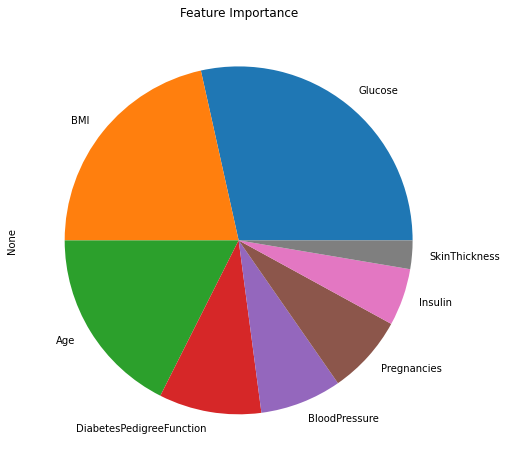

[0.2848442337930363, 0.21518000156167813, 0.1756915965569812, 0.09521022912957884, 0.07578827188413771, 0.0735804930034086, 0.05316152706313017, 0.026543647008049082]


In [25]:
feature_importances = random_forest.feature_importances_
importances = pd.Series(feature_importances, index=features.columns)
plt.figure(figsize = (8, 8))
plt.title('Feature Importance')
importances.nlargest(len(features.columns)).plot(kind='pie')
plt.show()
feature_importances = sorted(feature_importances, reverse=True)
print(feature_importances)

In [26]:
features_weighted = ['Glucose', 'BMI', 'Age']
weights = feature_importances[:3]
probabilities_gini = []
probabilities_entropy = []
probabilities_rf = []

In [27]:
max_depth = 5
random_state = 42
accuracy_phrase = 'The Accuracy based on {} on Test set is {:.4f} {}'

In [28]:
for feat in features_weighted:
    data = pd.read_csv('diabetes.csv')
    del data[feat]
    print('{} deleted'.format(feat))
    features = data.drop(['Outcome'], axis = 1).copy()
    X_train, X_test, y_train, y_test = model_selection.train_test_split(
        features, targets, test_size = 0.19, random_state = random_state)
    
    dec_tree_gini = tree.DecisionTreeClassifier(
        max_depth = max_depth, random_state = random_state, criterion = 'gini')
    dec_tree_gini = dec_tree_gini.fit(X_train, y_train)
    prediction_test_gini = dec_tree_gini.predict(X_test)
    probabilities = []
    
    dec_tree_entropy = tree.DecisionTreeClassifier(
        max_depth = max_depth, random_state = random_state, criterion = 'entropy')
    dec_tree_entropy = dec_tree_entropy.fit(X_train, y_train)
    prediction_test_entropy = dec_tree_entropy.predict(X_test)
    probabilities = []

    random_forest = ensemble.RandomForestClassifier(n_estimators=n_estimators, criterion='gini',
                                                    min_samples_leaf=2, min_samples_split=3, 
                                                    max_features='sqrt',
                                                    random_state=21, n_jobs=2, max_depth=max_depth)
    random_forest.fit(X_train, y_train)
    prediction_test_rf = random_forest.predict(X_test)

    acc_gini = metrics.accuracy_score(y_test, prediction_test_gini)*100
    print('The Accuracy based on {} on Test set is {:.4f} {}'
          .format('Gini', acc_gini, '%'))
    probabilities_gini.append(acc_gini)
    
    acc_entropy = metrics.accuracy_score(y_test, prediction_test_entropy)*100
    print('The Accuracy based on {} on Test set is {:.4f} {}'
          .format('Entropy', acc_entropy, '%'))
    probabilities_entropy.append(acc_entropy)
    
    acc_rf = metrics.accuracy_score(y_test, prediction_test_rf)*100
    print('The Accuracy based on {} on Test set is {:.4f} {}'
          .format('Random Forest', acc_rf, '%'))
    probabilities_rf.append(acc_rf)

Glucose deleted
The Accuracy based on Gini on Test set is 69.1781 %
The Accuracy based on Entropy on Test set is 68.4932 %
The Accuracy based on Random Forest on Test set is 76.7123 %
BMI deleted
The Accuracy based on Gini on Test set is 71.2329 %
The Accuracy based on Entropy on Test set is 71.2329 %
The Accuracy based on Random Forest on Test set is 75.3425 %
Age deleted
The Accuracy based on Gini on Test set is 73.9726 %
The Accuracy based on Entropy on Test set is 76.0274 %
The Accuracy based on Random Forest on Test set is 78.7671 %


In [29]:
print('Weights: {}'.format(weights))
print('Gini: {}'.format(probabilities_gini))
print('Entropy: {}'.format(probabilities_entropy))
print('Random forest: {}'.format(probabilities_rf))

Weights: [0.2848442337930363, 0.21518000156167813, 0.1756915965569812]
Gini: [69.17808219178082, 71.23287671232876, 73.97260273972603]
Entropy: [68.4931506849315, 71.23287671232876, 76.02739726027397]
Random forest: [76.71232876712328, 75.34246575342466, 78.76712328767124]


In [30]:
weighted_avg_gini = np.average(probabilities_gini, weights=weights)
weighted_avg_entropy = np.average(probabilities_entropy, weights=weights)
weighted_avg_rf = np.average(probabilities_rf, weights=weights)
print('Gini Weighted Average: {}'.format(weighted_avg_gini))
print('Entropy Weighted Average: {}'.format(weighted_avg_entropy))
print('Random forest Weighted Average: {}'.format(weighted_avg_rf))

Gini Weighted Average: 71.07904054923137
Entropy Weighted Average: 71.32457473950335
Random forest Weighted Average: 76.81036258749012
